Keras documentation

https://keras.io/api/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from keras import Model 
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Reshape, Input
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras.datasets.fashion_mnist import load_data
from keras.preprocessing.image import ImageDataGenerator

In [17]:
(x_train,y_train),(x_test,y_test) = load_data() 
x_train = x_train[...,np.newaxis]
x_test = x_test[...,np.newaxis]

x_train = x_train/255.
x_test = x_test/255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [5]:
class_names = ['T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']


In [8]:
# 모델 구성 및 컴파일

def build_model():
  model = Sequential()
  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Flatten()(output)
  output = Dense(128,activation='relu')(output)
  output = Dense(64,activation='relu')(output)
  output = Dense(10,activation='softmax')(output)

  model = Model(inputs = [input], outputs=output)
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', # 예측값을 정수로 처리
                metrics=['acc'])
  return model 
model_1 = build_model()
model_1.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 30976)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               3965056   
                                                                 
 dense_4 (Dense)             (None, 64)                8256

In [9]:
hist_1=model_1.fit(x_train,y_train,
                   epochs=25,
                   validation_split=0.3,
                   batch_size=128)

Epoch 1/25
329/329 [==============================] - 13s 14ms/step - loss: 0.5008 - acc: 0.8205 - val_loss: 0.3892 - val_acc: 0.8619
Epoch 2/25
329/329 [==============================] - 4s 13ms/step - loss: 0.3372 - acc: 0.8766 - val_loss: 0.3664 - val_acc: 0.8675
Epoch 3/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2839 - acc: 0.8950 - val_loss: 0.3613 - val_acc: 0.8716
Epoch 4/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2365 - acc: 0.9124 - val_loss: 0.3619 - val_acc: 0.8763
Epoch 5/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2034 - acc: 0.9238 - val_loss: 0.4080 - val_acc: 0.8666
Epoch 6/25
329/329 [==============================] - 4s 13ms/step - loss: 0.1769 - acc: 0.9342 - val_loss: 0.4506 - val_acc: 0.8685
Epoch 7/25
329/329 [==============================] - 4s 13ms/step - loss: 0.1536 - acc: 0.9432 - val_loss: 0.4671 - val_acc: 0.8688
Epoch 8/25
329/329 [==============================] - 4s 13ms/step -

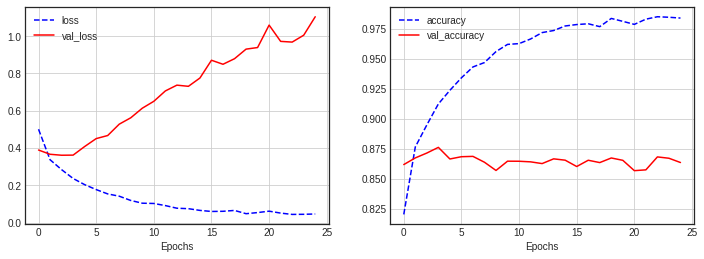

In [10]:
hist_1.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_1.history['loss'],'b--',label='loss')
plt.plot(hist_1.history['val_loss'], 'r', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_1.history['acc'],'b--',label='accuracy')
plt.plot(hist_1.history['val_acc'], 'r', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [11]:
model_1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2166 - acc: 0.8551


[1.2166025638580322, 0.8550999760627747]

### 모델 구성 및 학습 : 과대적합 방지
- 슬림한 모델로 변경

In [12]:
def build_model2():
  model = Sequential()
  input = Input(shape=(28,28,1))
  output = Conv2D(filters=32, kernel_size=(3,3))(input)
  output = MaxPooling2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Dropout(0.4)(output)
  output = MaxPooling2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Dropout(0.4)(output)
  output = MaxPooling2D(strides=(2,2))(output)
  output = Flatten()(output)
  output = Dense(128,activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(64,activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(10,activation='softmax')(output)

  model = Model(inputs = [input], outputs=output)
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', # 예측값을 정수로 처리
                metrics=['acc'])
  return model 
model_2 = build_model2()
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                       

In [13]:
hist_2=model_2.fit(x_train,y_train,
                   epochs=40,
                   validation_split=0.3,
                   batch_size=128)

Epoch 1/40
329/329 [==============================] - 3s 7ms/step - loss: 1.1761 - acc: 0.5659 - val_loss: 0.6973 - val_acc: 0.7533
Epoch 2/40
329/329 [==============================] - 2s 6ms/step - loss: 0.7318 - acc: 0.7366 - val_loss: 0.6047 - val_acc: 0.7814
Epoch 3/40
329/329 [==============================] - 2s 6ms/step - loss: 0.6473 - acc: 0.7686 - val_loss: 0.5718 - val_acc: 0.7873
Epoch 4/40
329/329 [==============================] - 2s 6ms/step - loss: 0.6019 - acc: 0.7847 - val_loss: 0.5165 - val_acc: 0.8074
Epoch 5/40
329/329 [==============================] - 2s 6ms/step - loss: 0.5766 - acc: 0.7968 - val_loss: 0.5148 - val_acc: 0.8078
Epoch 6/40
329/329 [==============================] - 2s 6ms/step - loss: 0.5506 - acc: 0.8060 - val_loss: 0.5246 - val_acc: 0.8004
Epoch 7/40
329/329 [==============================] - 2s 6ms/step - loss: 0.5252 - acc: 0.8157 - val_loss: 0.5084 - val_acc: 0.8094
Epoch 8/40
329/329 [==============================] - 2s 6ms/step - loss: 0.

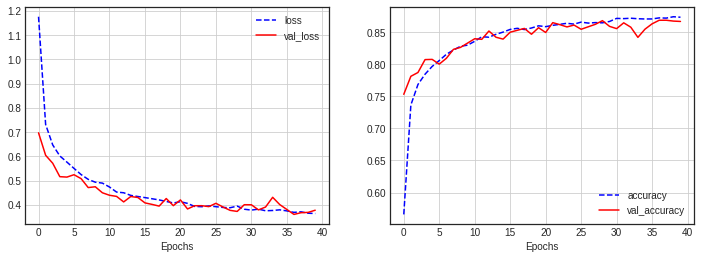

In [14]:
hist_2.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_2.history['loss'],'b--',label='loss')
plt.plot(hist_2.history['val_loss'], 'r', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_2.history['acc'],'b--',label='accuracy')
plt.plot(hist_2.history['val_acc'], 'r', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [15]:
from keras.layers import BatchNormalization

In [20]:
def build_model3():
  model = Sequential()
  input = Input(shape=(28,28,1))
  output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(input)
  output = BatchNormalization()(output)
  output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
  output = Dropout(0.5)(output)
  output = MaxPooling2D(strides=(2,2))(output)

  output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
  output = BatchNormalization()(output)
  output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='valid')(output)
  output = Dropout(0.5)(output)
  output = MaxPooling2D(strides=(2,2))(output)
  
  output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(output)
  output = BatchNormalization()(output)
  output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
  output = Dropout(0.5)(output)
  output = MaxPooling2D(strides=(2,2))(output)

  output = Flatten()(output)
  output = Dense(512,activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(256,activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(10,activation='softmax')(output)

  model = Model(inputs = [input], outputs=output)
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', # 예측값을 정수로 처리
                metrics=['acc'])
  return model 
model_3 = build_model3()
model_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 dropout_9 (Dropout)         (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                       

In [21]:
hist_3=model_3.fit(x_train,y_train,
                   epochs=25,
                   validation_split=0.3,
                   batch_size=128)

Epoch 1/25
329/329 [==============================] - 10s 27ms/step - loss: 0.7452 - acc: 0.7355 - val_loss: 2.2161 - val_acc: 0.1959
Epoch 2/25
329/329 [==============================] - 8s 25ms/step - loss: 0.4331 - acc: 0.8489 - val_loss: 1.1055 - val_acc: 0.5976
Epoch 3/25
329/329 [==============================] - 8s 25ms/step - loss: 0.3679 - acc: 0.8731 - val_loss: 0.7392 - val_acc: 0.7862
Epoch 4/25
329/329 [==============================] - 8s 25ms/step - loss: 0.3303 - acc: 0.8862 - val_loss: 0.6911 - val_acc: 0.8226
Epoch 5/25
329/329 [==============================] - 8s 25ms/step - loss: 0.3101 - acc: 0.8921 - val_loss: 0.5651 - val_acc: 0.8502
Epoch 6/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2920 - acc: 0.8987 - val_loss: 0.4771 - val_acc: 0.8949
Epoch 7/25
329/329 [==============================] - 8s 25ms/step - loss: 0.2783 - acc: 0.9043 - val_loss: 0.5674 - val_acc: 0.8392
Epoch 8/25
329/329 [==============================] - 8s 25ms/step -

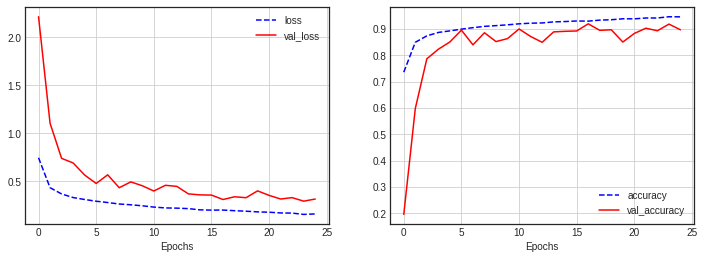

In [22]:
hist_3.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_3.history['loss'],'b--',label='loss')
plt.plot(hist_3.history['val_loss'], 'r', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_3.history['acc'],'b--',label='accuracy')
plt.plot(hist_3.history['val_acc'], 'r', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [24]:
model_3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3256 - acc: 0.8927


[0.3255772888660431, 0.8927000164985657]

### 모델 성능 높이기 : Image Augmentation


In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [28]:
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.2,
    shear_range = 0.6,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)
augment_size = 200
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [30]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1),augment_size).reshape(-1,28,28,1),
                                 np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

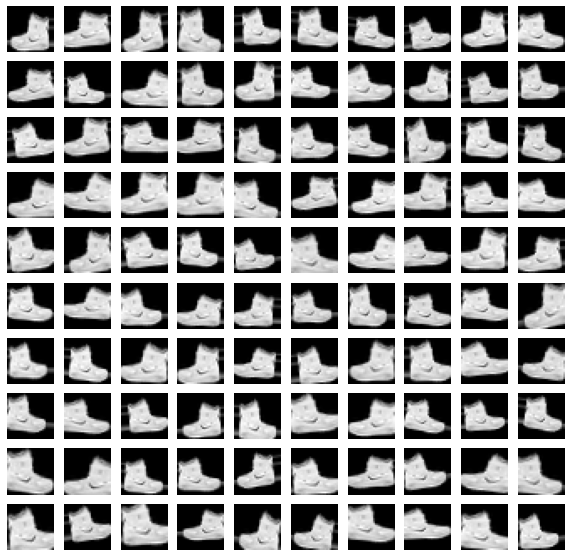

In [31]:
plt.figure(figsize=(10,10))
for i in range(1,101):
  plt.subplot(10,10,i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28,28),cmap='gray')

In [34]:
image_generator = ImageDataGenerator(
    rotation_range = 15,
    zoom_range = 0.1,
    shear_range = 0.6,
    width_shift_range = 0.15,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 30000
random_mask = np.random.randint(x_train.shape[0],size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [35]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size,shuffle=False).next()[0]

In [36]:
x_train = np.concatenate((x_train,x_augmented))
y_train = np.concatenate((y_train,y_augmented))
print(x_train.shape)
print(y_train.shape)

(90000, 28, 28, 1)
(90000,)


In [37]:
model_4 = build_model3() 
model_4.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_27 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 dropout_14 (Dropout)        (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                       

In [38]:
hist_4 = model_4.fit(x_train,y_train,
                     epochs=40,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/40
493/493 [==============================] - 14s 26ms/step - loss: 0.7166 - acc: 0.7415 - val_loss: 2.5523 - val_acc: 0.1058
Epoch 2/40
493/493 [==============================] - 12s 25ms/step - loss: 0.4232 - acc: 0.8525 - val_loss: 1.2976 - val_acc: 0.5853
Epoch 3/40
493/493 [==============================] - 12s 25ms/step - loss: 0.3528 - acc: 0.8791 - val_loss: 1.3127 - val_acc: 0.5438
Epoch 4/40
493/493 [==============================] - 12s 25ms/step - loss: 0.3228 - acc: 0.8885 - val_loss: 1.1867 - val_acc: 0.6469
Epoch 5/40
493/493 [==============================] - 12s 25ms/step - loss: 0.3012 - acc: 0.8960 - val_loss: 1.1903 - val_acc: 0.6104
Epoch 6/40
493/493 [==============================] - 12s 25ms/step - loss: 0.2817 - acc: 0.9017 - val_loss: 1.3258 - val_acc: 0.5845
Epoch 7/40
493/493 [==============================] - 12s 25ms/step - loss: 0.2712 - acc: 0.9069 - val_loss: 0.9571 - val_acc: 0.7013
Epoch 8/40
493/493 [==============================] - 12s 25ms

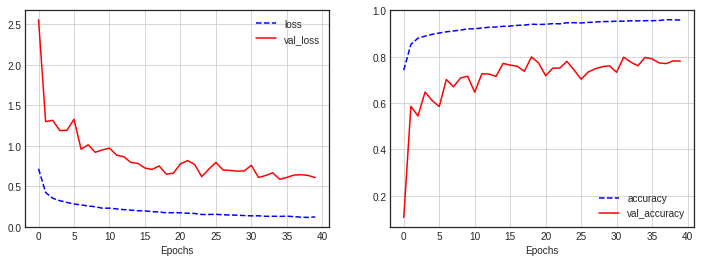

In [39]:
hist_4.history.keys()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_4.history['loss'],'b--',label='loss')
plt.plot(hist_4.history['val_loss'], 'r', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_4.history['acc'],'b--',label='accuracy')
plt.plot(hist_4.history['val_acc'], 'r', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [40]:
model_4.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2697 - acc: 0.9043


[0.26966264843940735, 0.9042999744415283]